In [24]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
heart=pd.read_csv('Heartdiseases.csv')

In [3]:
heart.head(5)

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,0,1,125,212,1,1,168,2,1,2,1,0
1,53,0,1,140,203,0,0,155,1,2,0,1,0
2,70,0,1,145,174,1,1,125,1,2,0,1,0
3,61,0,1,148,203,1,1,161,2,1,1,1,0
4,62,1,1,138,294,0,1,106,2,3,3,2,0


In [25]:
heart.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   sex                            1025 non-null   int64
 1   chest_pain_type                1025 non-null   int64
 2   resting_blood_pressure         1025 non-null   int64
 3   cholestoral                    1025 non-null   int64
 4   fasting_blood_sugar            1025 non-null   int64
 5   rest_ecg                       1025 non-null   int64
 6   Max_heart_rate                 1025 non-null   int64
 7   exercise_induced_angina        1025 non-null   int64
 8   slope                          1025 non-null   int64
 9   vessels_colored_by_flourosopy  1025 non-null   int64
 10  thalassemia                    1025 non-null   int64
 11  target                         1025 non-null   int64
 12  cluster                        1025 non-null   int32
dtypes: int32(1), int64

In [26]:
percent_missing =round(100*(heart.isnull().sum())/len(heart),2)
percent_missing



sex                              0.0
chest_pain_type                  0.0
resting_blood_pressure           0.0
cholestoral                      0.0
fasting_blood_sugar              0.0
rest_ecg                         0.0
Max_heart_rate                   0.0
exercise_induced_angina          0.0
slope                            0.0
vessels_colored_by_flourosopy    0.0
thalassemia                      0.0
target                           0.0
cluster                          0.0
dtype: float64

In [28]:
cleaned_data = heart.drop([ 'Max_heart_rate'], axis=1)
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   sex                            1025 non-null   int64
 1   chest_pain_type                1025 non-null   int64
 2   resting_blood_pressure         1025 non-null   int64
 3   cholestoral                    1025 non-null   int64
 4   fasting_blood_sugar            1025 non-null   int64
 5   rest_ecg                       1025 non-null   int64
 6   exercise_induced_angina        1025 non-null   int64
 7   slope                          1025 non-null   int64
 8   vessels_colored_by_flourosopy  1025 non-null   int64
 9   thalassemia                    1025 non-null   int64
 10  target                         1025 non-null   int64
 11  cluster                        1025 non-null   int32
dtypes: int32(1), int64(11)
memory usage: 92.2 KB


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

def show_boxplot(df):
    plt.rcParams['figure.figsize'] = [14, 6]
    sns.boxplot(data=df, orient="v")
    plt.title("Outliers Distribution", fontsize=16)
    plt.ylabel("Range", fontweight='bold')
    plt.xlabel("Attributes", fontweight='bold')
    plt.show()  # This line is added to display the plot


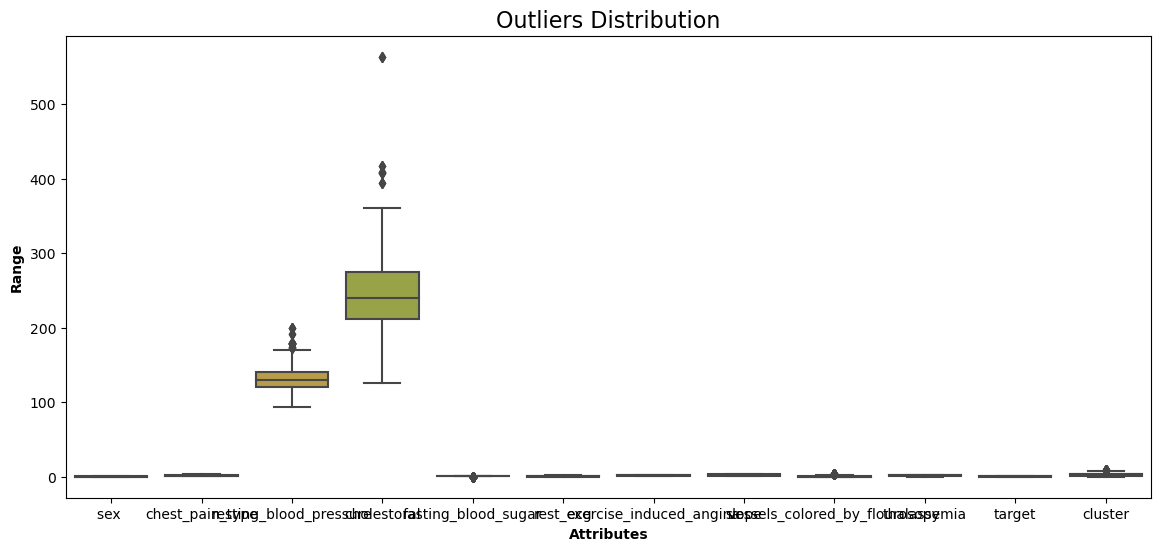

In [31]:
show_boxplot(cleaned_data)

In [33]:
def remove_outliers(data):
    df = data.copy()

    for col in list(df.columns):
        Q1 = df[str(col)].quantile(0.05)
        Q3 = df[str(col)].quantile(0.95)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[str(col)] >= lower_bound) & (df[str(col)] <= upper_bound)]

    return df


In [34]:
without_outliers = remove_outliers(cleaned_data)

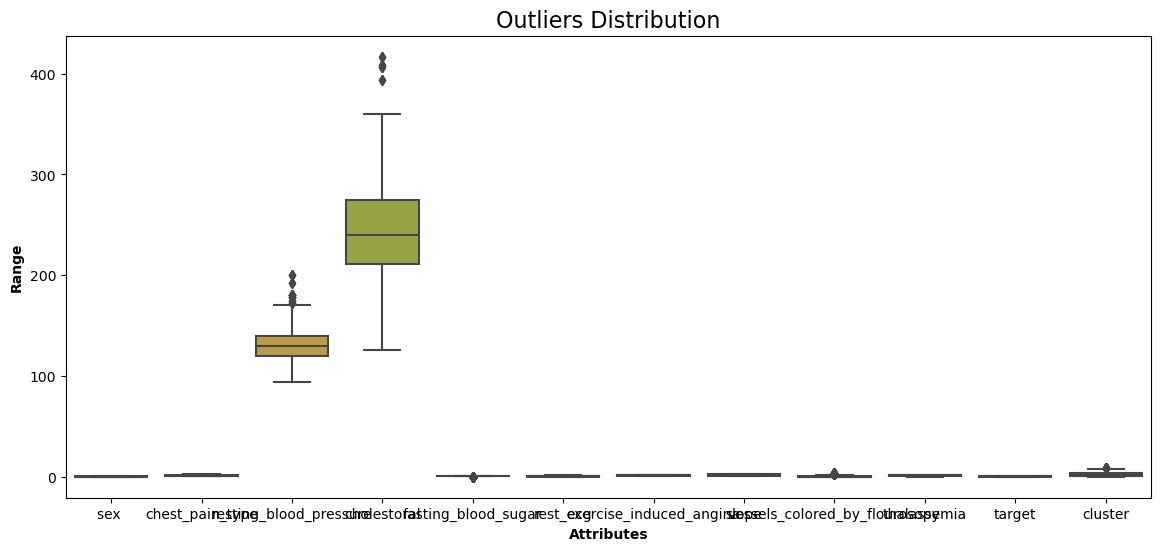

In [35]:
show_boxplot(without_outliers)

In [36]:
without_outliers.shape

(1022, 12)

In [37]:
from sklearn.preprocessing import StandardScaler

data_scaler = StandardScaler()

scaled_data = data_scaler.fit_transform(without_outliers)
scaled_data.shape

(1022, 12)

In [38]:
from scipy.cluster.hierarchy import linkage, dendrogram

complete_clustering = linkage(scaled_data, method="complete", metric="euclidean")
average_clustering = linkage(scaled_data, method="average", metric="euclidean")
single_clustering = linkage(scaled_data, method="single", metric="euclidean")

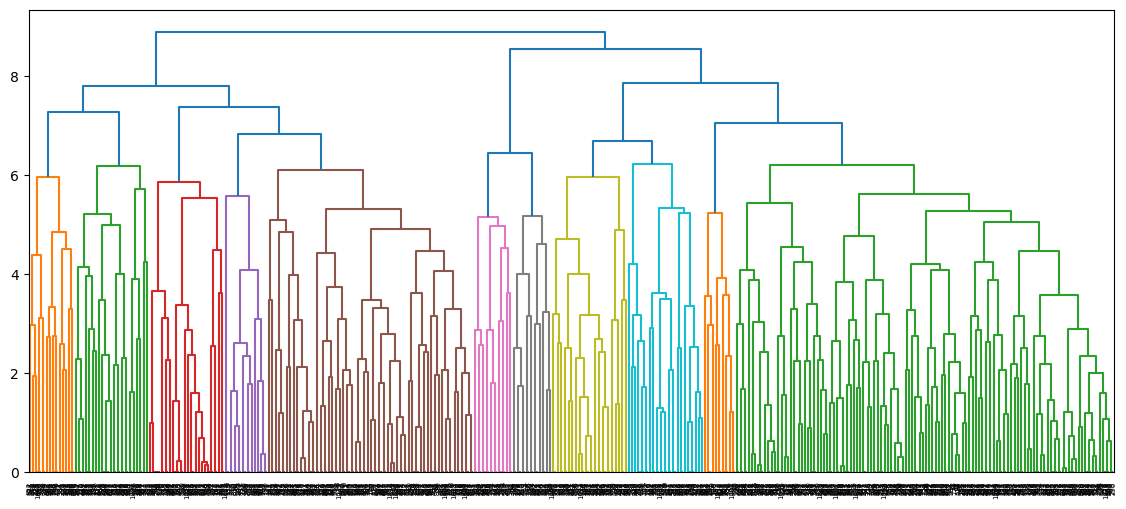

In [39]:
dendrogram(complete_clustering)
plt.show()

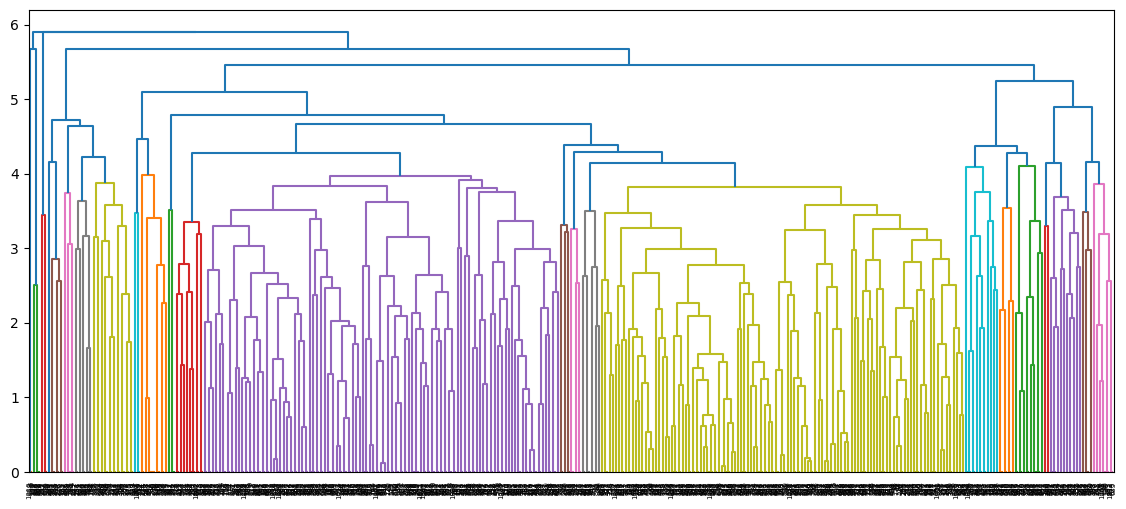

In [40]:
dendrogram(average_clustering)
plt.show()

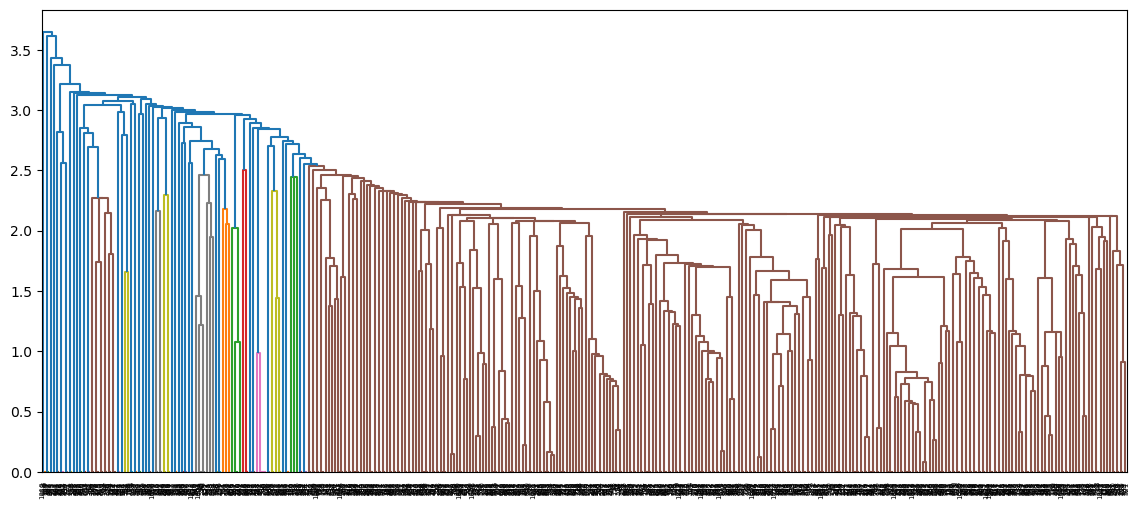

In [41]:
dendrogram(single_clustering)
plt.show()

In [42]:
cluster_labels = cut_tree(average_clustering, n_clusters=2).reshape(-1, )
without_outliers["Cluster"] = cluster_labels

sns.boxplot(x='Cluster', y='fico', data=without_outliers)

NameError: name 'cut_tree' is not defined

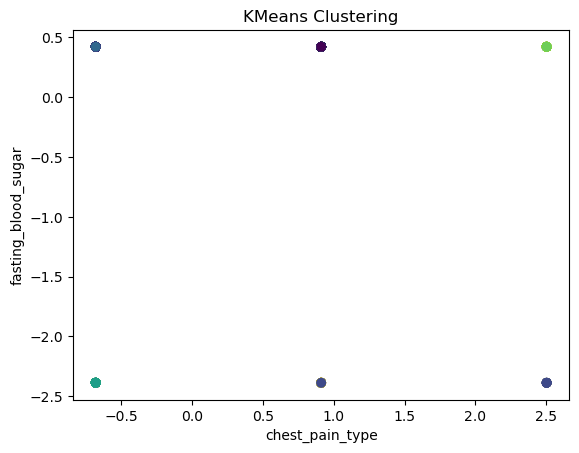

In [20]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=heart['cluster'], cmap='viridis')
plt.title('KMeans Clustering')
plt.xlabel('chest_pain_type')
plt.ylabel('fasting_blood_sugar')
plt.show()

In [21]:
cluster_means = heart.groupby('cluster').mean()
print(cluster_means)


             sex   chest_pain_type  resting_blood_pressure  cholestoral  \
cluster                                                                   
0        0.402878         2.000000              127.035971   235.561151   
1        0.265957         1.000000              131.822695   255.131206   
2        0.250000         2.325000              138.800000   261.075000   
3        0.296667         1.000000              128.360000   241.666667   
4        0.444444         2.000000              130.911111   253.700000   
5        0.233333         1.000000              130.800000   225.866667   
6        0.365385         1.000000              144.230769   267.096154   
7        0.000000         3.000000              142.696970   229.151515   
8        0.357143         3.000000              134.714286   229.285714   
9        0.193548         2.096774              139.451613   227.000000   

         fasting_blood_sugar  rest_ecg  Max_heart_rate  \
cluster                                  

In [18]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_scaled, heart['cluster'])
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.584716213475215


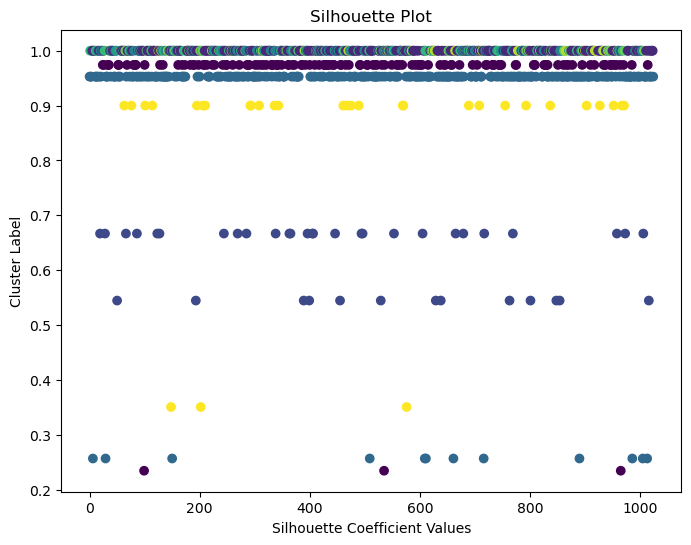

In [22]:
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
import numpy as np

silhouette_values = silhouette_samples(X_scaled, heart['cluster'])

plt.figure(figsize=(8, 6))
plt.scatter(range(len(heart)), silhouette_values, c=heart['cluster'], cmap='viridis')
plt.title('Silhouette Plot')
plt.xlabel('Silhouette Coefficient Values')
plt.ylabel('Cluster Label')
plt.show()
